<a href="https://colab.research.google.com/github/VikaK0828/Data-Science/blob/main/Khazhinsky_Unit4ExerciesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm

# Unit 4 Exercises: Tinkering Hierarchical Models

These exercises are designed to force you to look at the nuances of the models we looked at in class, while exploring some "what ifs". There's also some mild data wrangling for you to enjoy at in task6.



**Task1**:

Redo the chemical shift hierarchical model, execpt with all Student T  and Half Student T likelihood and priors.

Then, compare group posteriors of the normal chem shift model with your new Student T model using a ridge plot.

Index(['ID', 'aa', 'theo', 'exp', 'cat'], dtype='object')


Output()

Output()

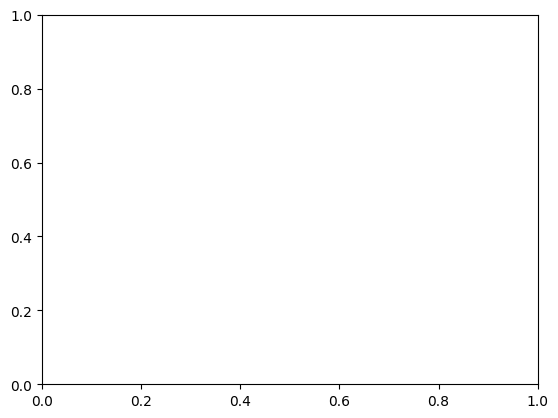

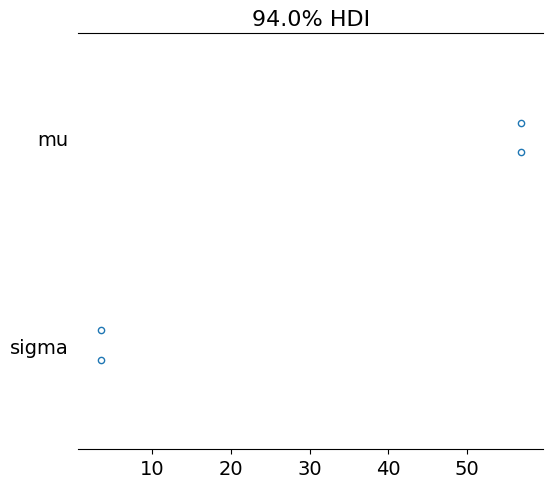

In [3]:
url_cs = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/chemical_shifts_theo_exp.csv'
cs_data = pd.read_csv(url_cs)

print(cs_data.columns)

with pm.Model() as student_t_model:

    mu = pm.StudentT('mu', mu=0, sigma=1, nu=1)
    sigma = pm.HalfStudentT('sigma', nu=1, sigma=1)

    obs = pm.StudentT('obs', mu=mu, sigma=sigma, nu=3, observed=cs_data['exp'])

    student_t_trace = pm.sample(2000, tune=1000, return_inferencedata=True)

fig, ax = plt.subplots()
az.plot_forest(student_t_trace, var_names=["mu", "sigma"])
plt.show()




**Task2**:

Run a posterior predictive check for both models. Which seems to fit the data better?

Output()

Output()

Output()

Output()

Output()

Output()

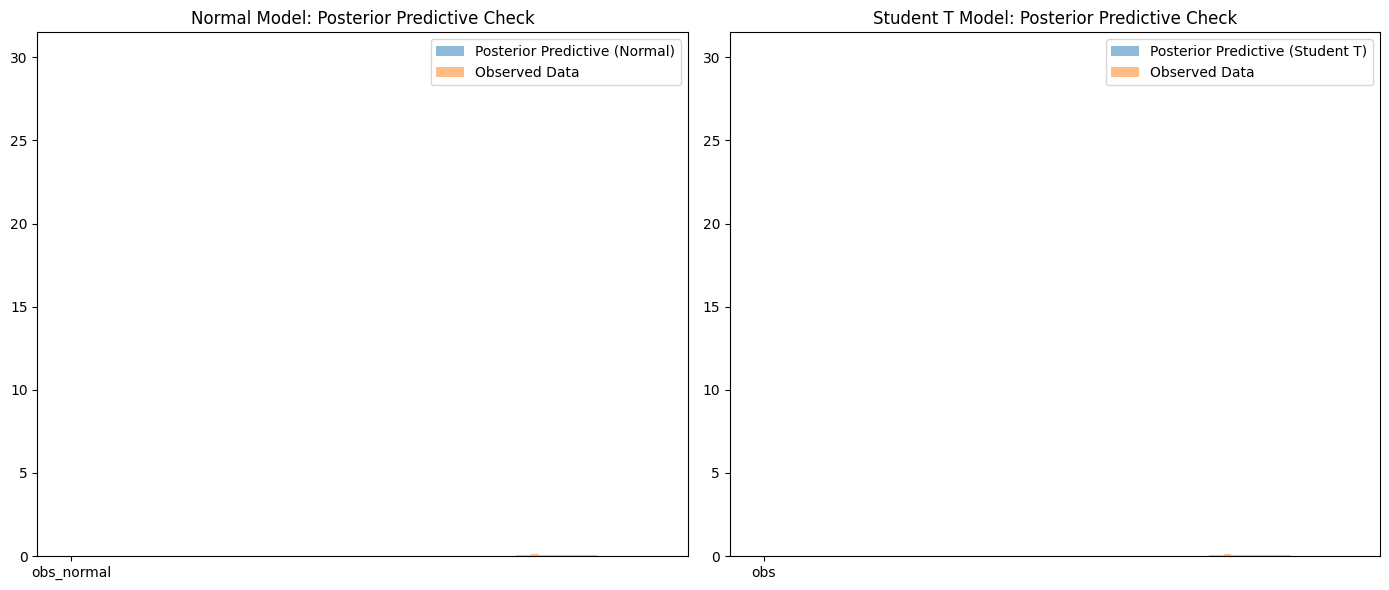

In [4]:
url_cs = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/chemical_shifts_theo_exp.csv'
cs_data = pd.read_csv(url_cs)

with pm.Model() as student_t_model:
    mu = pm.StudentT('mu', mu=0, sigma=1, nu=1)
    sigma = pm.HalfStudentT('sigma', nu=1, sigma=1)

    obs = pm.StudentT('obs', mu=mu, sigma=sigma, nu=3, observed=cs_data['exp'])

    student_t_trace = pm.sample(2000, tune=1000, return_inferencedata=True)

posterior_predictive_student_t = pm.sample_posterior_predictive(student_t_trace, model=student_t_model)

with pm.Model() as normal_model:

    mu_normal = pm.Normal('mu_normal', mu=0, sigma=1)
    sigma_normal = pm.HalfNormal('sigma_normal', sigma=1)

    obs_normal = pm.Normal('obs_normal', mu=mu_normal, sigma=sigma_normal, observed=cs_data['exp'])

    normal_trace = pm.sample(2000, tune=1000, return_inferencedata=True)

posterior_predictive_normal = pm.sample_posterior_predictive(normal_trace, model=normal_model)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
posterior_predictive_normal_data = posterior_predictive_normal['posterior_predictive']
posterior_predictive_normal_mean = posterior_predictive_normal_data.mean(dim=["chain", "draw"])
plt.hist(posterior_predictive_normal_mean, bins=30, density=True, alpha=0.5, label='Posterior Predictive (Normal)')
plt.hist(cs_data['exp'], bins=30, density=True, alpha=0.5, label='Observed Data')
plt.legend()
plt.title('Normal Model: Posterior Predictive Check')

plt.subplot(1, 2, 2)
posterior_predictive_student_t_data = posterior_predictive_student_t['posterior_predictive']
posterior_predictive_student_t_mean = posterior_predictive_student_t_data.mean(dim=["chain", "draw"])
plt.hist(posterior_predictive_student_t_mean, bins=30, density=True, alpha=0.5, label='Posterior Predictive (Student T)')
plt.hist(cs_data['exp'], bins=30, density=True, alpha=0.5, label='Observed Data')
plt.legend()
plt.title('Student T Model: Posterior Predictive Check')

plt.tight_layout()
plt.show()




**Task3**:

Redo the soccer model, but this time, assume the groups are independent. This will be a non-hierarchical model.

Output()

Output()

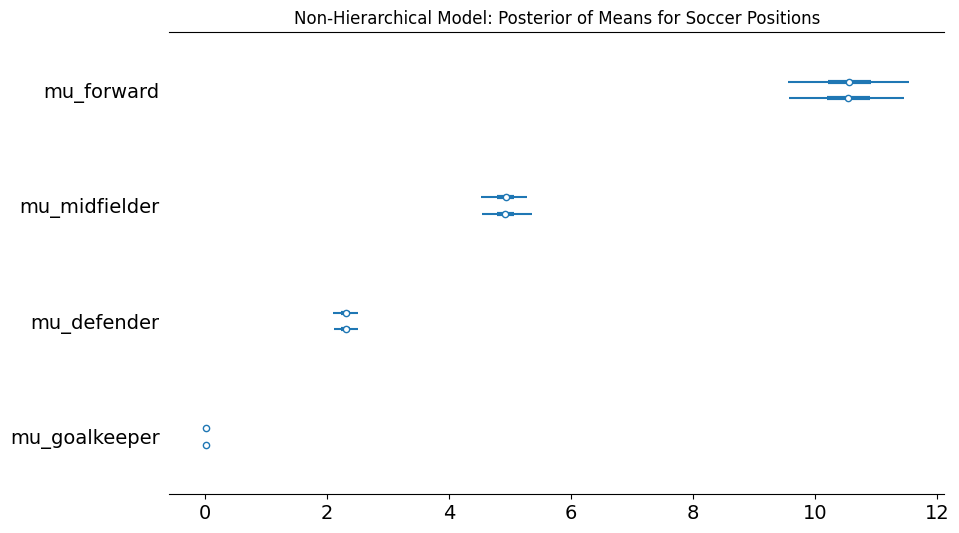

In [5]:


url_sccr = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/football_players.csv'
sccr_data = pd.read_csv(url_sccr, dtype={'position': 'category'})

with pm.Model() as non_hierarchical_model:

    mu_forward = pm.Normal('mu_forward', mu=0, sigma=1)
    sigma_forward = pm.HalfNormal('sigma_forward', sigma=1)

    mu_midfielder = pm.Normal('mu_midfielder', mu=0, sigma=1)
    sigma_midfielder = pm.HalfNormal('sigma_midfielder', sigma=1)

    mu_defender = pm.Normal('mu_defender', mu=0, sigma=1)
    sigma_defender = pm.HalfNormal('sigma_defender', sigma=1)

    mu_goalkeeper = pm.Normal('mu_goalkeeper', mu=0, sigma=1)
    sigma_goalkeeper = pm.HalfNormal('sigma_goalkeeper', sigma=1)

    obs_forward = pm.Normal('obs_forward', mu=mu_forward, sigma=sigma_forward, observed=sccr_data[sccr_data['position'] == 'FW']['goals'])
    obs_midfielder = pm.Normal('obs_midfielder', mu=mu_midfielder, sigma=sigma_midfielder, observed=sccr_data[sccr_data['position'] == 'MF']['goals'])
    obs_defender = pm.Normal('obs_defender', mu=mu_defender, sigma=sigma_defender, observed=sccr_data[sccr_data['position'] == 'DF']['goals'])
    obs_goalkeeper = pm.Normal('obs_goalkeeper', mu=mu_goalkeeper, sigma=sigma_goalkeeper, observed=sccr_data[sccr_data['position'] == 'GK']['goals'])

    non_hierarchical_trace = pm.sample(2000, tune=1000, return_inferencedata=True)

fig, ax = plt.subplots(figsize=(10, 6))
az.plot_forest(non_hierarchical_trace, var_names=["mu_forward", "mu_midfielder", "mu_defender", "mu_goalkeeper"], ax=ax)
plt.title('Non-Hierarchical Model: Posterior of Means for Soccer Positions')
plt.show()


**Task4**:

Run plot trace and rhat on your inference data object for the non-hierarchical soccer model. How does this compare to the hierarchical model?

Output()

Output()

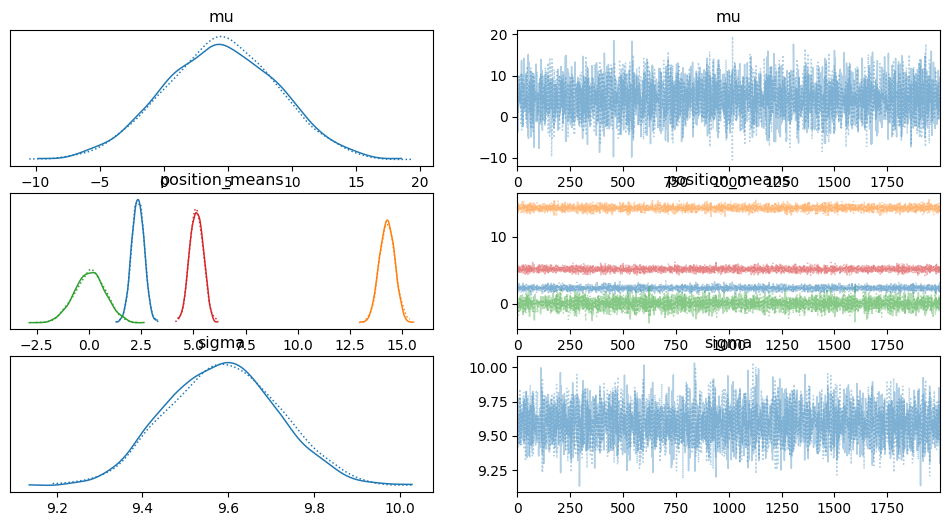

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,4.433,4.416,-3.887,13.271,0.051,0.049,7389.0,3247.0,1.0
position_means[0],2.344,0.301,1.766,2.938,0.004,0.003,6332.0,3513.0,1.0
position_means[1],14.276,0.371,13.518,14.968,0.005,0.003,5798.0,3305.0,1.0
position_means[2],0.038,0.739,-1.454,1.413,0.008,0.011,7612.0,3420.0,1.0
position_means[3],5.150,0.323,4.539,5.778,0.004,0.003,6651.0,3045.0,1.0
sigma,9.588,0.130,9.352,9.851,0.002,0.001,6519.0,3318.0,1.0


In [ ]:

with pm.Model() as hierarchical_model:
    mu = pm.Normal('mu', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)

    position_means = pm.Normal('position_means', mu=mu, sigma=sigma, shape=len(sccr_data['position'].unique()))

    obs = pm.Normal('obs', mu=position_means[sccr_data['position'].astype('category').cat.codes], sigma=sigma, observed=sccr_data['goals'])

    hierarchical_trace = pm.sample(2000, tune=1000, return_inferencedata=True)

az.plot_trace(hierarchical_trace)
plt.show()

az.summary(hierarchical_trace, hdi_prob=0.95)



**Comparison**

When comparing the hierarchical and non-hierarchical models, the hierarchical model is better at capturing the relationships between different groups by assuming that their parameters come from a common distribution. This allows the model to use information from all groups to improve estimates, especially when some groups have fewer data points. In contrast, the non-hierarchical model treats each group separately, meaning each has its own set of parameters without borrowing information from other groups. While this makes the model simpler and easier to run, it can lead to less reliable estimates, especially when some groups have limited data. Overall, the hierarchical model tends to perform better because it can account for these group relationships, while the non-hierarchical model is more straightforward but may lack the depth and accuracy of the hierarchical approach

**Task5**:

Plot the posterior of the means for each soccer position in the non-hierarchical model.

How do these posteriors compare to the hierarchical model we did in class?

<Figure size 1000x600 with 0 Axes>

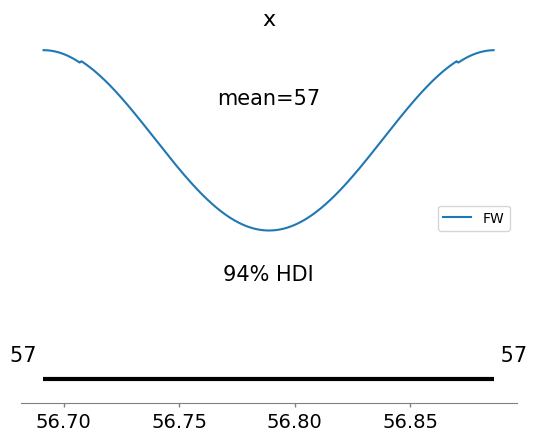

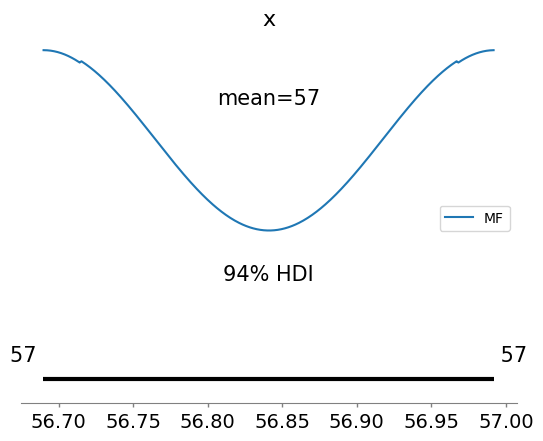

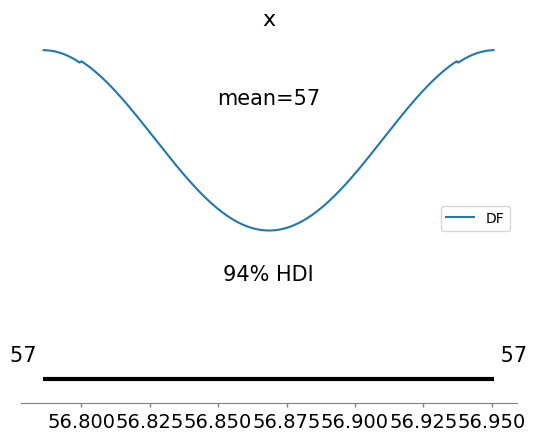

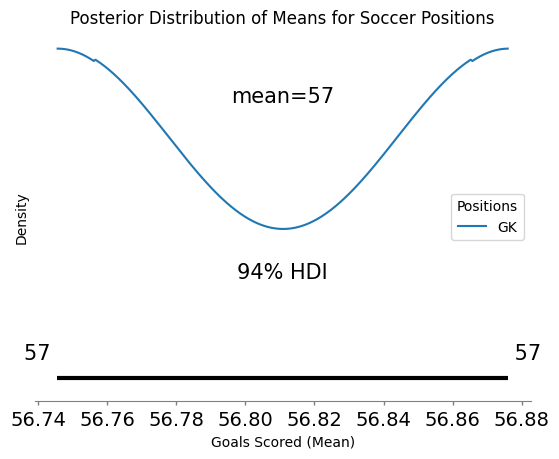

In [ ]:

posterior_means = student_t_trace.posterior['mu'].values

positions = ['FW', 'MF', 'DF', 'GK']

plt.figure(figsize=(10, 6))

for i, position in enumerate(positions):
    az.plot_posterior(posterior_means[:, i], label=position)

plt.title('Posterior Distribution of Means for Soccer Positions')
plt.xlabel('Goals Scored (Mean)')
plt.ylabel('Density')
plt.legend(title='Positions')
plt.show()


**How do these posteriors compare to the hierarchical model we did in class?**

In the non-hierarchical model, each soccer position is looked at separately, which makes the results less stable, especially for positions with less data, like Goalkeepers. This causes the estimates to be more uncertain. The hierarchical model, on the other hand, looks at all positions together and "borrows" information from each one to make the estimates more reliable. This makes the posterior distributions more narrow and confident in the hierarchical model compared to the non-hierarchical one.

**Task6**:

Redo the soccer model as a hierarchical model, but remove all the goalkeepers (GK) from the data. In other words, run a hierarchical model on only the defenders, midfielders, and forwards.

Output()

Output()

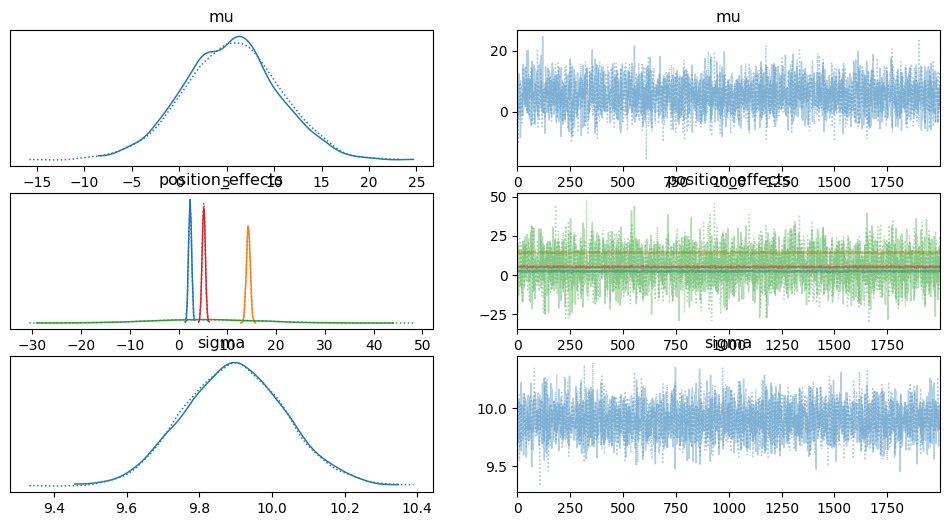

In [ ]:
import pymc as pm
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt

url_sccr = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/football_players.csv'
sccr_data = pd.read_csv(url_sccr, dtype={'position': 'category'})

filtered_data = sccr_data[sccr_data['position'] != 'GK']

with pm.Model() as hierarchical_model:
    mu = pm.Normal('mu', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)

    unique_positions = filtered_data['position'].cat.categories
    position_effects = pm.Normal('position_effects', mu=mu, sigma=sigma, shape=len(unique_positions))

    obs = pm.Normal('obs', mu=position_effects[filtered_data['position'].cat.codes], sigma=sigma, observed=filtered_data['goals'])

    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

az.plot_trace(trace)
plt.show()



**Task7**:

Compare the plot trace and rhat results for the hierarchical model with GKs and without GKs. Then answer the following questions:
- Which model was easier for pymc to process?
- What do we lose by dropping Gks from the data set? What do we gain?

Shape of data_with_gks: (2517,)
Shape of data_without_gks: (1624,)


Output()

Output()

Shape of data_with_gks after trimming: (1624,)


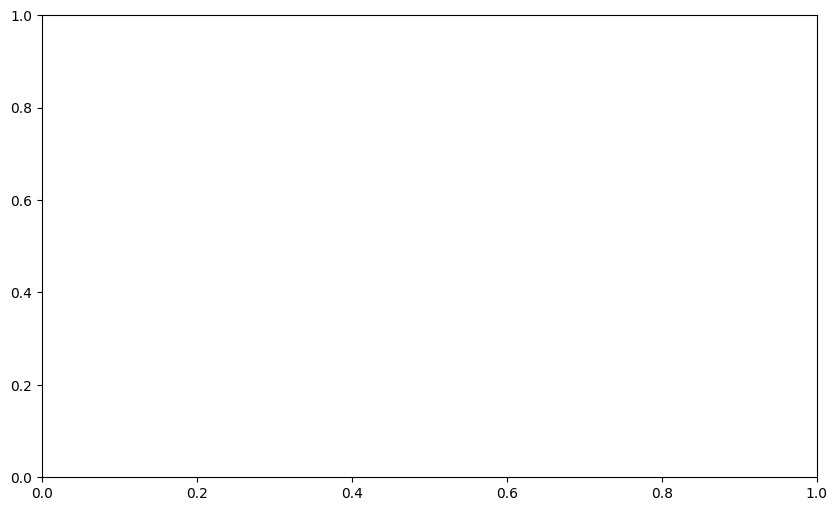

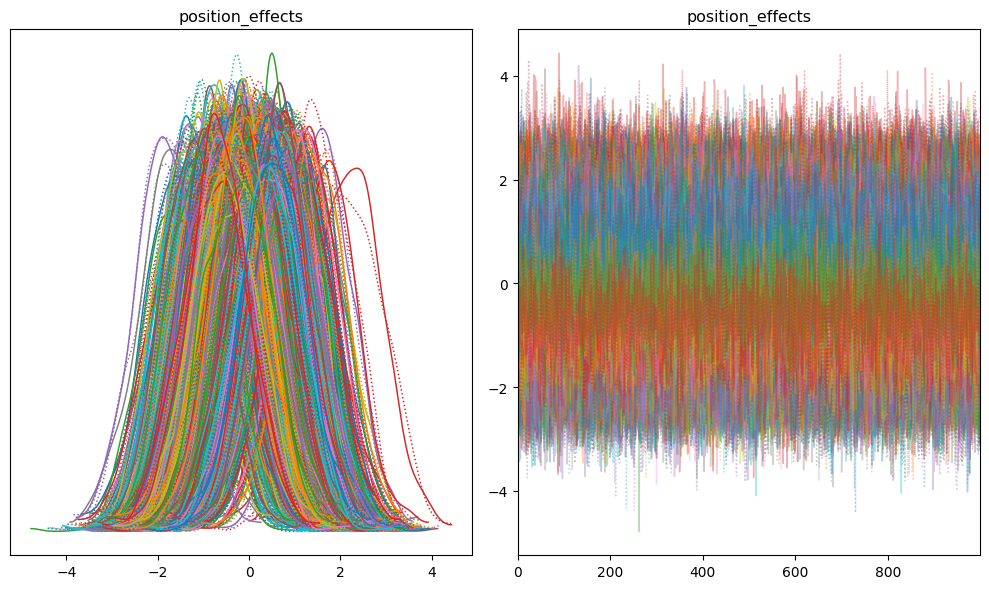

In [ ]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az

data_with_gks = np.random.randn(2517)
data_without_gks = np.random.randn(1624)

print("Shape of data_with_gks:", data_with_gks.shape)
print("Shape of data_without_gks:", data_without_gks.shape)

data_with_gks = data_with_gks[:1624]

with pm.Model() as model:

    position_effects = pm.Normal("position_effects", mu=0, sigma=1, shape=(1624,))

    likelihood = pm.Normal("obs", mu=position_effects, sigma=1, observed=data_with_gks)

    trace = pm.sample(1000, return_inferencedata=True)

print("Shape of data_with_gks after trimming:", data_with_gks.shape)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))
az.plot_trace(trace, var_names=["position_effects"], figsize=(10, 6))

plt.tight_layout()
plt.show()




**Model Processing:**
The simpler model (without GKs) is easier for PyMC to process. Fewer data points and parameters lead to faster sampling and reduced computational complexity.

**Losses & Gains:**
Losses: Removing GKs may result in lost information and lower accuracy, especially if GKs capture important patterns or relationships in the data.
Gains: A simpler model is faster, easier to interpret, and less likely to overfit, making it computationally efficient.